In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
tests = pd.read_csv("../dados/raw/test_data.csv")

- Verificar o início, fim e amostras aleatorias do dataset.

In [25]:
tests.head(10)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02
5,70002653,"ALBUMINA, SORO/PLASMA (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.29
6,70001206,"ZINCO, SORO",CA,TOXICO,TOXICOLOGY,2.20
7,70005903,"VITAMINA B12 (COBALAMINA), SORO",CA,TOXICO,VITAMINS,2.20
8,70000392,"FOSFORO, SORO (EXEMPLO DE EXPRESSAO DE RESULTA...",CA,CORELAB,BIOCHEMISTRY,1.43
9,70000168,"ACIDO FOLICO, SORO",CA,CORELAB,IMMUNOHORMONE,2.38


In [26]:
tests[-10:].head(10)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1992,70008711,"CORTISOL LIVRE, QUANTITATIVO, COMPOSTO, URINA ...",CA,CORELAB,IMMUNOHORMONE,2.05
1993,70003273,OBSTETRICA COM TRANSLUCENCIA NUCAL - US- SEGUN...,RID,ULTRASOUND,FETAL MEDICINE,101.54
1994,70002655,MPL W515 E MPL S505 ANALISE MUTACIONAL,CA,GENETICS,SPECIAL GENETICS,179.79
1995,70006589,"DETECCAO, TRISSOMIAS FETAIS 21, 18, 13 E MICRO...",CA,GENETICS,SPECIAL GENETICS,1762.46
1996,70001839,POLIMORFISMO CY2C9*2 E CYP2*3 - TESTE DE SENSI...,CA,GENETICS,SPECIAL GENETICS,102.77
1997,70008635,"GENES BRCA1 E BRCA2, MLPA, SANGUE",CA,GENETICS,SPECIAL GENETICS,159.91
1998,70005303,"OBSTETRICA 1§ TRIMESTRE (ENDOVAGINAL), SEGUNDO...",RID,ULTRASOUND,FETAL MEDICINE,111.43
1999,70006441,"HEMOFILIA A, ANALISE DO DNA, SEQUENCIAMENTO, S...",CA,GENETICS,SPECIAL GENETICS,27.03
2000,70004141,"INSULINA, SORO, 90 MIN APOS XXX",CA,CORELAB,IMMUNOHORMONE,5.55
2001,70001506,"INSULINA, SORO, 30 MIN APOS XXX",CA,CORELAB,IMMUNOHORMONE,1.99


In [27]:
tests.sample(10)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
494,70005968,"CAFEINA, DOSAGEM, SORO",CA,CORELAB,BIOCHEMISTRY,1.66
1887,70001925,CITOLOGICO DE LCR,CA,HEMATO,HEMATOCYTOLOGY,10.68
1254,70007567,CURVA GLICEMICA (6 DOSAGENS),CA,CORELAB,BIOCHEMISTRY,12.71
1493,70003688,"PLASMODIOS, PESQUISA, SANGUE",CA,HEMATO,HEMATOCYTOLOGY,79.82
1325,70008007,DISLIPIDEMIADISLIPIDEMIAS E ATEROSCLEROSE DISL...,CA,GENETICS,SPECIAL GENETICS,99.44
845,70004563,"NEURONTIN (GABAPENTINA), DOSAGEM, SORO",CA,TOXICO,THERAPEUTIC DRUG,54.74
164,70000251,"ANTITROMBINA III, DOSAGEM, PLASMA",CA,HEMATO,COAGULATION,8.62
263,70002190,VACINA PARA CATAPORA,VX,VACCINE,VACCINE,31.26
649,70000777,"CITOMEGALOVIRUS IGG, AVIDEZ, QUANTITATIVO, SORO",CA,CORELAB,INFECTIOUS,75.71
7,70005903,"VITAMINA B12 (COBALAMINA), SORO",CA,TOXICO,VITAMINS,2.20


- Verificar erros de tipo

In [28]:
tests.dtypes

CodItem           int64
Desc Item        object
Category         object
Family           object
Speciality       object
Testing Cost    float64
dtype: object

- Analisar taxa de entrada com 0.

In [29]:
# Verificando o numero de testes
tests.isna().sum()

CodItem         0
Desc Item       0
Category        0
Family          0
Speciality      0
Testing Cost    0
dtype: int64

In [30]:
# Testes com custo 0
print("Taxa de testes grátis",(tests["Testing Cost"]==0).sum()/tests["Testing Cost"].shape[0])
tests[tests["Testing Cost"]==0]

Taxa de testes grátis 0.0034965034965034965


,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
187,70006809,RM MATERIAIS/MEDICAMENTOS,RID,MRI,MAT / MED,0.0
343,70006810,TC MATERIAIS/MEDICAMENTOS,RID,CT SCAN,MAT / MED,0.0
818,70002489,VOLUME URINARIO,CA,CORELAB,BIOCHEMISTRY,0.0
1536,70001660,"PROLACTINA (BASAL DE PROVA), SORO",CA,CORELAB,IMMUNOHORMONE,0.0
1860,70006904,DERIVADO - DOPPLER TIREOIDE,RID,ULTRASOUND,DOPPLER,0.0
1877,70006910,DERIVADO - DOPPLER ABDOME SUPERIOR,RID,ULTRASOUND,DOPPLER,0.0
1978,70006899,DERIVADO - DOPPLER VASOS CERVICAIS ART,RID,ULTRASOUND,DOPPLER,0.0


- Procurar por duplicatas.

In [31]:
print("Numero de ids duplicados:",tests.duplicated("CodItem").sum())
tests[tests.duplicated("CodItem")]
tests[tests.CodItem==70004701]

Numero de ids duplicados: 1


,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1208,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96
1968,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96


In [32]:
print("Número de descricoes duplicadas",tests["Desc Item"].duplicated().sum())
tests[tests["Desc Item"].duplicated(keep=False)].sort_values("Desc Item")

Número de descricoes duplicadas 5


,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1126,70001703,ANGIO-TC AORTA TORACICA,RID,CT SCAN,VASCULAR,367.67
1595,70002668,ANGIO-TC AORTA TORACICA,RID,CT SCAN,VASCULAR,212.76
1476,70001282,"CATECOLAMINAS FRACIONADAS, PLASMA",CA,CORELAB,BIOCHEMISTRY,32.65
1599,70008329,"CATECOLAMINAS FRACIONADAS, PLASMA",CA,CORELAB,BIOCHEMISTRY,8.65
570,70006181,CURVA GLICO-INSULINEMICA (5 DOSAGENS),CA,CORELAB,IMMUNOHORMONE,2.18
1235,70008527,CURVA GLICO-INSULINEMICA (5 DOSAGENS),CA,CORELAB,IMMUNOHORMONE,11.67
500,70003394,"PLAQUETAS, ANTICORPOS IGG E IGM, SORO",CA,CORELAB,IMMUNOHORMONE,65.57
1495,70007965,"PLAQUETAS, ANTICORPOS IGG E IGM, SORO",CA,CORELAB,IMMUNOHORMONE,50.29
1208,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96
1968,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96


- Visualizar a distribuição de cada coluna e checar se seguem uma distribuição lógica.

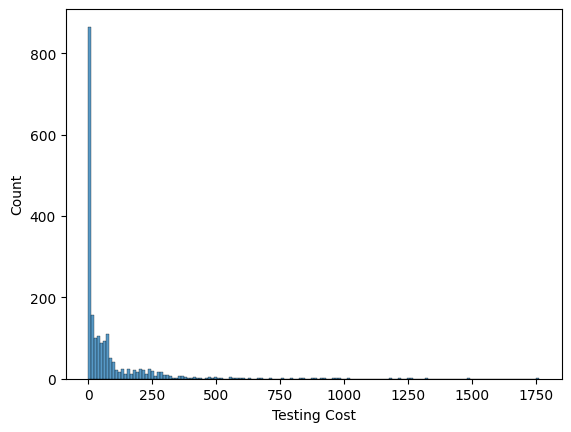

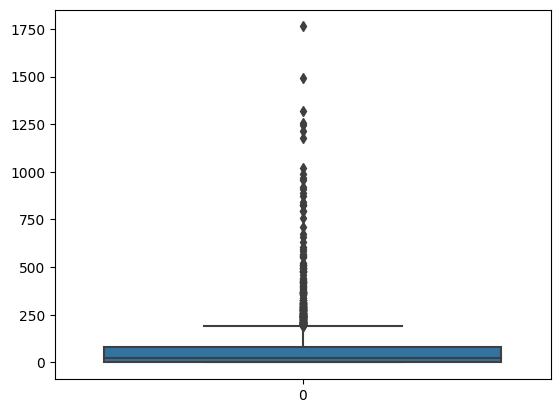

In [33]:
sns.histplot(tests["Testing Cost"])
plt.show()
sns.boxplot(tests["Testing Cost"])
plt.show()

In [34]:
tests.sort_values(["Testing Cost"],ascending=False).head(10)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
1995,70006589,"DETECCAO, TRISSOMIAS FETAIS 21, 18, 13 E MICRO...",CA,GENETICS,SPECIAL GENETICS,1762.46
1925,70003713,"EXOMA COMPLETO, SEQUENCIAMENTO (NGS), SANGUE",CA,GENETICS,SPECIAL GENETICS,1490.77
1007,70004827,"MICOBACTERIAS (BAAR), LCR, CULTURA",CA,MICROBIO,MYCOLOGY,1320.21
1579,70002005,MAMOTOMIA POR ESTEREOTAXIA (NAO INCLUI O EXAME...,RID,MAMMO,INVASIVE PROCEDURE,1257.58
434,70005603,CINTILOGRAFIA MIOCARDIO REPOUSO/ESFORCO,RID,INTERNAL,SCINTILOGRAPHY,1246.47
1923,70002449,"DETECCAO, TRISSOMIAS 21, 18, 13 E MONOSSOMIA D...",CA,GENETICS,SPECIAL GENETICS,1216.64
1278,70008011,"ARRITMIA CARD¡ACA, PAINEL GERAL, SEQUENCIAMENT...",CA,GENETICS,SPECIAL GENETICS,1178.19
1316,70008015,"RASOPATIAS (NOONAN, LEOPARD, COSTELLO), SEQUEN...",CA,GENETICS,SPECIAL GENETICS,1018.45
878,70001320,"MYCOPLASMA PNEUMONIAE, PESQUISA, DIVERSOS (XXX...",CA,GENETICS,BIOMOLECULAR,986.69
1279,70003618,"SINDROME DE NOONAN, PAINEL, SEQUENCIAMENTO (NG...",CA,GENETICS,SPECIAL GENETICS,968.32


- Verificar a prevalência de labels e categorias em cada amostra de dados.

In [35]:
tests["Category"].str.strip().value_counts()

CA     1579
RID     373
VX       27
PA       15
FEE       8
Name: Category, dtype: int64

In [36]:
tests["Category"]=tests["Category"].str.strip()

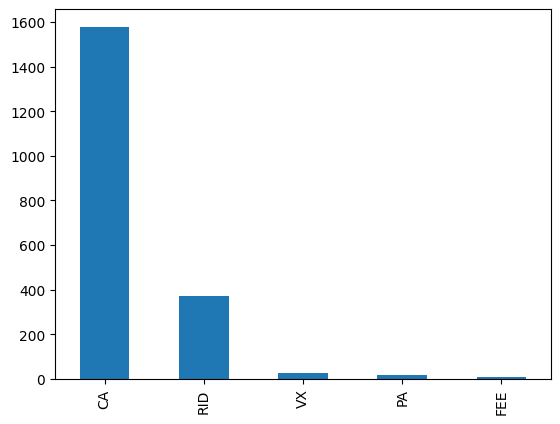

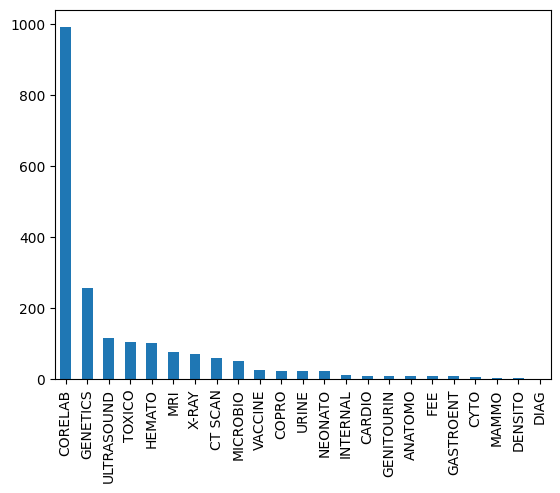

In [37]:
tests["Category"].str.strip().value_counts().plot(kind="bar")
plt.show()
tests["Family"].value_counts().plot(kind="bar")
plt.show()

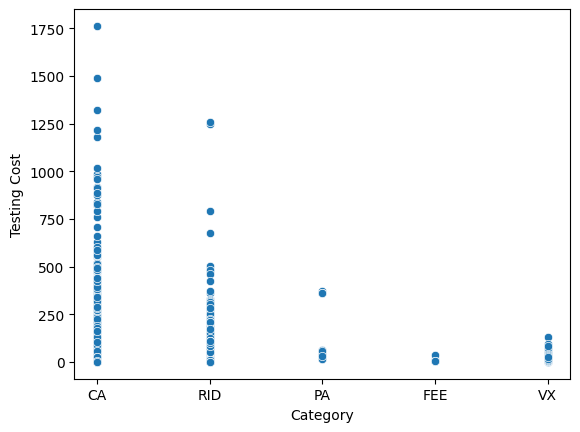

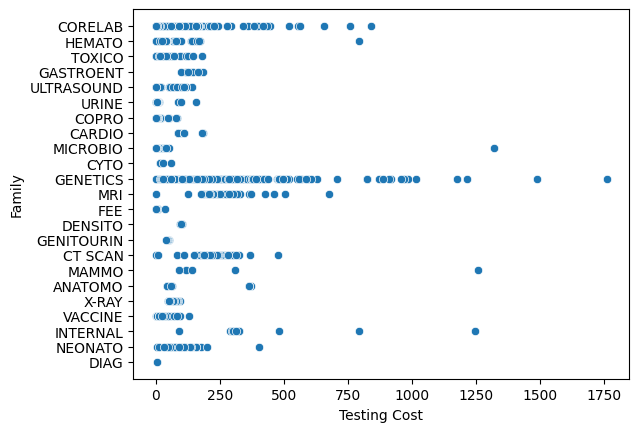

In [38]:
# Verificando a presença de outliers
sns.scatterplot(data=tests,y="Testing Cost",x="Category")
plt.show()
sns.scatterplot(data=tests,x="Testing Cost",y="Family")
plt.show()
# tests.groupby()

- Verificar outliers com Z-score, interquartile e/ou scatter plots

In [39]:
def abs_z_score(column:pd.Series):
    return ((column-column.mean())/column.std()).abs()
tests[abs_z_score(tests["Testing Cost"])>3]

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
262,70003401,RM ABDOME TOTAL,RID,MRI,INTERNAL MEDICINE,675.38
313,70001957,MIOCARDIO PERFUSAO - ESTRESSE FARMACOLOGICO(DI...,RID,INTERNAL,SCINTILOGRAPHY,793.11
434,70005603,CINTILOGRAFIA MIOCARDIO REPOUSO/ESFORCO,RID,INTERNAL,SCINTILOGRAPHY,1246.47
714,70002386,PRA - CLASSE I E CLASSE II,CA,GENETICS,BIOMOLECULAR,825.08
737,70002563,"RESISTENCIA DO HIV, INTEGRASE, GENE POL, SANGUE",CA,GENETICS,BIOMOLECULAR,629.73
840,70007907,"FIBROSE CISTICA, SEQUENCIAMENTO COMPLETO, (NGS...",CA,GENETICS,SPECIAL GENETICS,568.87
859,70005869,"ALERGENOS - PAINEL IGE, IMMUNOCAP ISAC, SORO",CA,CORELAB,ALLERGY,658.94
865,70005920,"FRAGMENTACAO DO DNA ESPERMATICO, ESPERMA",CA,GENETICS,SPECIAL GENETICS,552.81
878,70001320,"MYCOPLASMA PNEUMONIAE, PESQUISA, DIVERSOS (XXX...",CA,GENETICS,BIOMOLECULAR,986.69
883,70000543,"ACIDOS GRAXOS DE CADEIA MUITO LONGA, SORO",CA,CORELAB,BIOCHEMISTRY,840.48


- Verificar a prevalência de labels e categorias em cada amostra de dados.

In [40]:
# Categoria de cada variavel categorica
print(tests["Category"].unique())
print(tests["Family"].sort_values().unique())
print(tests["Speciality"].sort_values().unique())

['CA' 'RID' 'PA' 'FEE' 'VX']
['ANATOMO' 'CARDIO' 'COPRO' 'CORELAB' 'CT SCAN' 'CYTO' 'DENSITO' 'DIAG'
 'FEE' 'GASTROENT' 'GENETICS' 'GENITOURIN' 'HEMATO' 'INTERNAL' 'MAMMO'
 'MICROBIO' 'MRI' 'NEONATO' 'TOXICO' 'ULTRASOUND' 'URINE' 'VACCINE'
 'X-RAY']
['ABPM' 'AC / AP / VACCINE RATE' 'AC RATE' 'ALLERGY' 'ANATOMOPATHOLOGICAL'
 'AUTOIMMUNITY' 'BACTEROSCOPY' 'BIOCHEMISTRY' 'BIOMOLECULAR' 'BLOOD COUNT'
 'BLOOD GAS' 'CARDIAC MARKERS' 'CARDIOTOCOGRAPHY' 'CARDIOVASCULAR' 'CHEST'
 'COAGULATION' 'COLONOSCOPY' 'COLPOSCOPY' 'CONVENTIONAL' 'CULTURE'
 'CYTOGENETIC' 'CYTOMETRY' 'DENSITOMETRY' 'DIAGNOSTIC MEDICINE' 'DOPPLER'
 'DRUG ABUSE' 'ECHOCARDIOGRAPHY' 'ELECTROPHORESIS' 'ENDOSCOPY' 'ERGOMETRY'
 'FEE' 'FETAL MEDICINE' 'GENERAL' 'GRAPHICAL METHODS' 'HEAD AND NECK'
 'HEMATOCYTOLOGY' 'HIDDEN BLOOD' 'HLA' 'IMMUNOFETOTYPING'
 'IMMUNOHEMATOLOGY' 'IMMUNOHISTOCHEMISTRY' 'IMMUNOHORMONE' 'INBORN ERRORS'
 'INFECTIOUS' 'INTERNAL MEDICINE' 'INVASIVE PROCEDURE' 'LARYNGOSCOPY'
 'LIQUID CYTOLOGY' 'MAMA' 'MAMMOGRAP

In [42]:
tests["Testing Cost"].describe()

count    2002.000000
mean       77.767453
std       146.066382
min         0.000000
25%         4.812500
50%        21.190000
75%        79.270000
max      1762.460000
Name: Testing Cost, dtype: float64

### Observacoes test
- Estranhamente, há items com custo 0. Talvez uma promoção ou talvez um dado faltante.
- Existem itens duplicados, mas não com a mesma informação de preço.
- Alguns espaços e identações não esperadas no estados
- Variedade maior de testes na California
- Existem descricoes duplicadas, mas com precos e ids diferentes. Provavelmente uma atualização de preço de um item. Também pode existir a duplicação para manter uma série histórica de preços do mesmo item.
- Pensei em remover alguns outliers, mas percebi que a maioria deles eram de genetica, logo, era esperado o preço mais caro.